# <mark>BirdCLEF 2024 - EDA</mark>
<span style="font-size:22px;color:purple"> Thank you for having a look at my notebook - advice and feedback always welcomed!</span>


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Dataset Link: <a href="https://www.kaggle.com/competitions/birdclef-2024/data">https://www.kaggle.com/competitions/birdclef-2024/data</a>
</div>


## **Exploratory Data Analysis (EDA)** 
EDA is a crucial step in understanding and preparing your data for any data analysis or machine learning project. Here's a step-by-step guide on how to perform an EDA for this dataset:

**Overview**

In this competition, you will be predicting default of clients based on internal and external information that are available for each client. Scoring is performed using custom metric that not only evaluates the AUC of predictions but also considers the stability of predictions model across the data range of the test set. To better understand this metric.


**Data Collection:**

This dataset contains a large number of tables as a result of utilizing diverse data sources and the varying levels of data aggregation used while preparing the dataset. Note: All files listed below are found in both .csv and .parquet formats.


**Data Loading:**

Import the dataset into your preferred data analysis environment, such as Python with libraries like pandas, numpy, and matplotlib/seaborn for visualization.



### **Initial Exploration:**

**1 - Start by examining the basic characteristics of the data:**

    Check the first few rows using df.head().
    Check the data types and missing values using df.info().
    Calculate basic statistics using df.describe().
    Data Cleaning:

**2 - Handle missing values, outliers, and duplicates:**

    Use techniques like imputation for missing values.
    Identify and deal with outliers appropriately.
    Remove duplicate rows if necessary.
    
**3 - Data Visualization:**

    Create visualizations to gain insights into the data:
    Histograms and box plots for numerical features.
    Bar plots for categorical features.
    Correlation matrix and scatter plots to understand relationships between variables.
    
**4 - Feature Analysis:**

    Explore relationships between features and the target variable(s) for classification and outlier detection.
    Visualize how different features vary across different subtypes or classes.
    Use box plots, violin plots, or swarm plots to compare feature distributions.

**5 - Outlier Detection:**

    If your dataset contains information related to outlier detection, perform a dedicated EDA for this aspect:
    Visualize outliers using scatter plots or box plots.
    Apply statistical methods or machine learning techniques to identify outliers.

**6 - Dimensionality Reduction (optional):**

    If the dataset has many features, consider dimensionality reduction techniques like Principal Component Analysis (PCA) to reduce the number of variables while preserving important information.

**8 - Summary and Insights:**

    Summarize your findings from the EDA, including any patterns, trends, or anomalies observed.
    Document any data preprocessing steps applied.

**7 - Next Steps:**

    Based on your EDA findings, plan your next steps, which may include feature engineering, model selection, and further data preprocessing.


Remember that EDA is an iterative process, and you may need to revisit these steps as you delve deeper into the dataset and develop your machine learning or data analysis models.


## **Dataset Description**
Your challenge in this competition is to identify which birds are calling in recordings made in a Global Biodiversity Hotspot in the Western Ghats. This is an important task for scientists who monitor bird populations for conservation purposes. More accurate solutions could enable more comprehensive monitoring.

This competition uses a hidden test set. When your submitted notebook is scored, the actual test data will be made available to your notebook.

## **Files**
**train_audio/** The training data consists of short recordings of individual bird calls generously uploaded by users of xenocanto.org. These files have been downsampled to 32 kHz where applicable to match the test set audio and converted to the ogg format. The training data should have nearly all relevant files; we expect there is no benefit to looking for more on xenocanto.org and appreciate your cooperation in limiting the burden on their servers.

**test_soundscapes/** When you submit a notebook, the test_soundscapes directory will be populated with approximately 1,100 recordings to be used for scoring. They are 4 minutes long and in ogg audio format. The file names are randomized. It should take your submission notebook approximately five minutes to load all of the test soundscapes.

**unlabeled_soundscapes/** Unlabeled audio data from the same recording locations as the test soundscapes.

**train_metadata.csv** A wide range of metadata is provided for the training data. The most directly relevant fields are:

**primary_label** - a code for the bird species. You can review detailed information about the bird codes by appending the code to https://ebird.org/species/, such as https://ebird.org/species/amecro for the American Crow.

**latitude & longitude:** coordinates for where the recording was taken. Some bird species may have local call 'dialects,' so you may want to seek geographic diversity in your training data.

**author** - The user who provided the recording.

**filename:** the name of the associated audio file.

**sample_submission.csv** A valid sample submission.

row_id: A slug of [soundscape_id]_[end_time] for the prediction.
[bird_id]: There are 182 bird ID columns. You will need to predict the probability of the presence of each bird for each row.
eBird_Taxonomy_v2021.csv - Data on the relationships between different species.

In [47]:
#!pip install torch==1.12.0 torchvision==0.13.0 torchaudio==0.12.0

     |████████████████████████████████| 253 kB 13.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 87.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 83.2 MB/s eta 0:00:01
     |████████████████████████████████| 390 kB 77.5 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 68.3 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 420 kB/s  eta 0:00:01
     |████████████████████████████████| 11.1 MB 28.8 MB/s eta 0:00:01
     |████████████████████████████████| 43.6 MB 27 kB/s s eta 0:00:01
^C
ERROR: Operation cancelled by user


In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install tqdm
#!pip install librosa.display
!pip install plotly
!pip install shapely



     |████████████████████████████████| 12.4 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 345 kB 85.4 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 17.3 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 87.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 24.9 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 87.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 83.2 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 14.3 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 753 kB/s  eta 0:00:01
     |████████████████████████████████| 15.7 MB 13.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.5 MB 11.1 MB/s eta 0:00:01


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import pandas as pd

import pandas as pd
pd.options.mode.chained_assignment = None # avoids assignment warning
import numpy as np
import random
from glob import glob
from tqdm import tqdm
tqdm.pandas()  # enable progress bars in pandas operations
import gc

#import librosa
#import sklearn
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Import for visualization
import matplotlib as mpl
#cmap = mpl.cm.get_cmap('coolwarm')
import matplotlib.pyplot as plt
#import librosa.display as lid
import IPython.display as ipd
#import cv2

# Import KaggleDatasets for accessing Kaggle datasets
#from kaggle_datasets import KaggleDatasets

# WandB for experiment tracking
#import wandb


import torchaudio
import plotly.express as px
from IPython.display import Audio
from shapely.geometry import Point

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Exploração dos Metadados

In [21]:
# Load the train_metadata.csv file
metadata_df = pd.read_csv('input/birdclef-2024/train_metadata.csv')


# Display the first few rows of the metadata dataframe
metadata_df.head()

primary_label secondary_labels      type  latitude  longitude  \
0        asbfly               []  ['call']   39.2297   118.1987   
1        asbfly               []  ['song']   51.4030   104.6401   
2        asbfly               []  ['song']   36.3319   127.3555   
3        asbfly               []  ['call']   21.1697    70.6005   
4        asbfly               []  ['call']   15.5442    73.7733   

      scientific_name             common_name  \
0  Muscicapa dauurica  Asian Brown Flycatcher   
1  Muscicapa dauurica  Asian Brown Flycatcher   
2  Muscicapa dauurica  Asian Brown Flycatcher   
3  Muscicapa dauurica  Asian Brown Flycatcher   
4  Muscicapa dauurica  Asian Brown Flycatcher   

                              author  \
0                     Matt Slaymaker   
1                   Magnus Hellström   
2                      Stuart Fisher   
3                          vir joshi   
4  Albert Lastukhin & Sergei Karpeev   

                                             license  rating  \
0  Creative Commons Attribution-NonCommercial-Sha...     5.0   
1  Creative Commons Attribution-NonCommercial-Sha...     2.5   
2  Creative Commons Attribution-NonCommercial-Sha...     2.5   
3  Creative Commons Attribution-NonCommercial-Sha...     4.0   
4  Creative Commons Attribution-NonCommercial-Sha...     4.0   

                                 url             filename  
0  https://www.xeno-canto.org/134896  asbfly/XC134896.ogg  
1  https://www.xeno-canto.org/164848  asbfly/XC164848.ogg  
2  https://www.xeno-canto.org/175797  asbfly/XC175797.ogg  
3  https://www.xeno-canto.org/207738  asbfly/XC207738.ogg  
4  https://www.xeno-canto.org/209218  asbfly/XC209218.ogg

In [71]:
rating_0_df = metadata_df[metadata_df['rating'] == 0]
rating_0_df

primary_label secondary_labels  \
172         ashdro1               []   
258         ashpri1               []   
261         ashpri1               []   
333         ashwoo2               []   
407         asikoe2               []   
...             ...              ...   
24209       zitcis1               []   
24210       zitcis1               []   
24244       zitcis1               []   
24249       zitcis1               []   
24250       zitcis1               []   

                                                    type  latitude  longitude  \
172                                            ['adult']   13.6431    79.3978   
258                   ['adult', 'call', 'sex uncertain']   18.6472    72.8903   
261                                    ['adult', 'call']    6.4643    80.9033   
333                                             ['call']   13.0270   101.0451   
407                                             ['call']   22.5170   113.3927   
...                                                  ...       ...        ...   
24209                                           ['song']   41.0871     1.1009   
24210                                    ['flight call']   41.0871     1.1009   
24244                                    ['flight call']   42.7104    -8.7061   
24249                          ['adult', 'male', 'song']   46.9397    -2.1624   
24250  ['alarm call from a juvenile perched on a reed...   42.7235    -8.6731   

             scientific_name        common_name                   author  \
172     Dicrurus leucophaeus        Ashy Drongo             chandu bandi   
258          Prinia socialis        Ashy Prinia           Tushar Bhagwat   
261          Prinia socialis        Ashy Prinia        Daniel Danckwerts   
333           Artamus fuscus   Ashy Woodswallow                  Aladdin   
407    Eudynamys scolopaceus         Asian Koel                    james   
...                      ...                ...                      ...   
24209     Cisticola juncidis  Zitting Cisticola                 Sidney M   
24210     Cisticola juncidis  Zitting Cisticola                 Sidney M   
24244     Cisticola juncidis  Zitting Cisticola  Jacobo Ramil MIllarengo   
24249     Cisticola juncidis  Zitting Cisticola          Frantz Barrault   
24250     Cisticola juncidis  Zitting Cisticola  Jacobo Ramil MIllarengo   

                                                 license  rating  \
172          Creative Commons Attribution-ShareAlike 4.0     0.0   
258    Creative Commons Attribution-NonCommercial-Sha...     0.0   
261    Creative Commons Attribution-NonCommercial-Sha...     0.0   
333    Creative Commons Attribution-NonCommercial-Sha...     0.0   
407    Creative Commons Attribution-NonCommercial-Sha...     0.0   
...                                                  ...     ...   
24209  Creative Commons Attribution-NonCommercial-Sha...     0.0   
24210  Creative Commons Attribution-NonCommercial-Sha...     0.0   
24244  Creative Commons Attribution-NonCommercial-Sha...     0.0   
24249  Creative Commons Attribution-NonCommercial-Sha...     0.0   
24250  Creative Commons Attribution-NonCommercial-Sha...     0.0   

                                     url              filename  
172    https://www.xeno-canto.org/528339  ashdro1/XC528339.ogg  
258    https://www.xeno-canto.org/524458  ashpri1/XC524458.ogg  
261    https://www.xeno-canto.org/543425  ashpri1/XC543425.ogg  
333    https://www.xeno-canto.org/564998  ashwoo2/XC564998.ogg  
407    https://www.xeno-canto.org/313082  asikoe2/XC313082.ogg  
...                                  ...                   ...  
24209  https://www.xeno-canto.org/559943  zitcis1/XC559943.ogg  
24210  https://www.xeno-canto.org/559944  zitcis1/XC559944.ogg  
24244  https://www.xeno-canto.org/572732  zitcis1/XC572732.ogg  
24249  https://www.xeno-canto.org/573083  zitcis1/XC573083.ogg  
24250  https://www.xeno-canto.org/574113  zitcis1/XC574113.ogg  

[603 rows x 12 columns]

In [68]:
# # Função que mostra distruibção de alguma feature do metadata em forma de pizza
def plot_distribution(feature):
    feature_distribution = metadata_df[feature].value_counts().sort_index(ascending=False)
    colors = ['#2E8B57', '#3CB371', '#58D68D', '#74F9A4', '#9EF8C0',
              '#C7F8DB', '#E6F5D0', '#F9E79F', '#F7C677', '#F7A54A', '#F58231']
    rating_colors = {rating: color for rating, color in zip(feature_distribution.index, colors)}
    # Bar plot
    bar_data = go.Bar(x=feature_distribution.values, y=feature_distribution.index,
                      orientation='h', marker=dict(color=[rating_colors[rating] for rating in feature_distribution.index]), showlegend=False, name='')
    # Donut chart
    labels = feature_distribution.index.tolist()
    values = feature_distribution.values.tolist()
    total_count = sum(values)
    percentages = [(value / total_count) * 100 for value in values]
    donut_data = go.Pie(labels=labels, values=values, marker=dict(colors=[rating_colors[rating] for rating in feature_distribution.index], line=dict(color='#ffffff', width=0.5)), hole=0.55,
                        showlegend=False, name='', textinfo='label+percent', hoverinfo='label+percent', textposition='inside')
    fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])
    fig.add_trace(bar_data, row=1, col=1)
    fig.add_trace(donut_data, row=1, col=2)
    fig.update_layout(title=f'{feature} Distribution', plot_bgcolor='#1C1D20', paper_bgcolor='#1C1D20',
                      title_font=dict(size=20, family="Lato, sans-serif"), font=dict(color='#E1B12D'))
    fig.show()
plot_distribution("rating")

In [42]:
# Função que mostra distruibção de alguma feature do metadata em forma de linhas
def cat_feature_dist(data, feature):
    # Count unique values
    value_counts = data[feature].value_counts().sort_values(ascending=False)
    
    # Plot
    fig = px.bar(y=value_counts.index[::-1], x=value_counts[::-1], orientation='h')
    fig.update_yaxes(title='')
    fig.update_xaxes(title_text='Count')
    fig.update_layout(
        showlegend=False, 
        plot_bgcolor='#1C1D20', 
        paper_bgcolor='#1C1D20',
        font=dict(size=16, color='#E1B12D'),
        title_font=dict(size=20, color='#222'),
        barmode='group',  
        title=f"Distribution of '{feature}'"
    )
    fig.show()
    print(f"\nTotal unique values in '{feature}'are:",data[feature].nunique())
    print("\nTop 5 values:", value_counts.head())
    print("\nBottom 5 values:", value_counts.tail())

In [44]:
cat_feature_dist(metadata_df,'primary_label')



Total unique values in 'primary_label'are: 182

Top 5 values: primary_label
zitcis1    500
lirplo     500
barswa     500
woosan     500
bcnher     500
Name: count, dtype: int64

Bottom 5 values: primary_label
blaeag1    6
wynlau1    6
niwpig1    5
asiope1    5
integr     5
Name: count, dtype: int64


In [22]:
len(metadata_df)

24459

In [23]:
western_ghast_species_list = list(metadata_df['common_name'].loc[(metadata_df['latitude'] >= 8) & (metadata_df['latitude'] <= 20) & (metadata_df['longitude'] >= 70) & (metadata_df['longitude'] <= 78)].unique())
total_species_list = list(metadata_df['common_name'].unique())
len(western_ghast_species_list), len(metadata_df['common_name'].unique())

(165, 182)

In [24]:
not_western_ghast_species_list = [x for x in total_species_list if x not in western_ghast_species_list]
not_western_ghast_species_list

['Asian Openbill',
 'Barn Swallow',
 'Brahminy Starling',
 'Common Greenshank',
 'Eurasian Moorhen',
 'Oriental Darter',
 'Western Yellow Wagtail',
 'Eurasian Coot',
 'Garganey',
 'Glossy Ibis',
 'Gray Heron',
 'Intermediate Egret',
 'Kentish Plover',
 'Little Ringed Plover',
 'Marsh Sandpiper',
 'Painted Stork',
 'Speckled Piculet']

In [25]:
# Dataframe simplificado com a adição da coluna de espécie presente
# ou não em Western Ghast

clean_df = pd.DataFrame()

clean_df['Primary Label'] = metadata_df['primary_label']
clean_df['Secondary Label'] = metadata_df['secondary_labels']
clean_df['Type'] = metadata_df['type']
clean_df['Species'] = metadata_df['common_name']
clean_df['Species in Western G.'] = ((metadata_df['common_name'].isin(western_ghast_species_list)))
clean_df['Ratings'] = metadata_df['rating']

In [26]:
clean_df

Primary Label Secondary Label      Type                 Species  \
0            asbfly              []  ['call']  Asian Brown Flycatcher   
1            asbfly              []  ['song']  Asian Brown Flycatcher   
2            asbfly              []  ['song']  Asian Brown Flycatcher   
3            asbfly              []  ['call']  Asian Brown Flycatcher   
4            asbfly              []  ['call']  Asian Brown Flycatcher   
...             ...             ...       ...                     ...   
24454       zitcis1              []      ['']       Zitting Cisticola   
24455       zitcis1              []      ['']       Zitting Cisticola   
24456       zitcis1              []      ['']       Zitting Cisticola   
24457       zitcis1              []      ['']       Zitting Cisticola   
24458       zitcis1              []      ['']       Zitting Cisticola   

       Species in Western G.  Ratings  
0                       True      5.0  
1                       True      2.5  
2                       True      2.5  
3                       True      4.0  
4                       True      4.0  
...                      ...      ...  
24454                   True      5.0  
24455                   True      4.0  
24456                   True      4.0  
24457                   True      4.5  
24458                   True      5.0  

[24459 rows x 6 columns]

In [13]:
# Assuming metadata_df contains the data
# Create scatter plot on a map
fig = px.scatter_mapbox(metadata_df, lat='latitude', lon='longitude', color='primary_label', 
                        hover_name='primary_label', hover_data=['latitude', 'longitude'], 
                        title='Geographical Distribution of Bird Species',
                        zoom=1, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [45]:
#Lets plot for western ghat
# boundaries for the Western Ghats - as per Google search
lower_latitude = 8
upper_latitude = 22
lower_longitude = 73
upper_longitude = 79
filtered_data = metadata_df[(metadata_df['latitude'] >= lower_latitude) & 
                           (metadata_df['latitude'] <= upper_latitude) &
                           (metadata_df['longitude'] >= lower_longitude) &
                           (metadata_df['longitude'] <= upper_longitude)]

fig = px.scatter_mapbox(filtered_data, lat="latitude", lon="longitude", color="common_name",
                        zoom=5, center={"lat": (lower_latitude + upper_latitude) / 2, "lon": (lower_longitude + upper_longitude) / 2})
fig.update_layout( title="Distribution of Bird Species in the Western Ghats", plot_bgcolor=None, paper_bgcolor=None,
    title_font=dict(size=20, family="Lato, sans-serif", color='#E1B12D'),  font=dict(color='#E1B12D'),
    mapbox_style="carto-positron", margin=dict(t=50, r=50, b=50, l=50), hovermode='closest',
    showlegend=True, legend=dict(title='Bird Species'), legend_title_font=dict(color='#E1B12D'))
fig.show()

In [14]:
# Load the train_metadata.csv file
eBird_Taxonomy_df = pd.read_csv('input/birdclef-2024/eBird_Taxonomy_v2021.csv')

# Display the first few rows of the metadata dataframe
eBird_Taxonomy_df.head()

TAXON_ORDER CATEGORY SPECIES_CODE       PRIMARY_COM_NAME  \
0            1  species      ostric2         Common Ostrich   
1            6  species      ostric3         Somali Ostrich   
2            7    slash       y00934  Common/Somali Ostrich   
3            8  species      grerhe1           Greater Rhea   
4           14  species      lesrhe2            Lesser Rhea   

                         SCI_NAME            ORDER1  \
0                Struthio camelus  Struthioniformes   
1          Struthio molybdophanes  Struthioniformes   
2  Struthio camelus/molybdophanes  Struthioniformes   
3                  Rhea americana        Rheiformes   
4                    Rhea pennata        Rheiformes   

                      FAMILY SPECIES_GROUP REPORT_AS  
0  Struthionidae (Ostriches)     Ostriches       NaN  
1  Struthionidae (Ostriches)           NaN       NaN  
2  Struthionidae (Ostriches)           NaN       NaN  
3            Rheidae (Rheas)         Rheas       NaN  
4            Rheidae (Rheas)           NaN       NaN

In [15]:
# Summary statistics
metadata_df.describe()

latitude     longitude        rating
count  24081.000000  24081.000000  24459.000000
mean      32.537040     43.640699      3.843493
std       19.440382     50.191352      1.100840
min      -43.524000   -171.765400      0.000000
25%       17.160100      2.545700      3.000000
50%       37.155100     26.687600      4.000000
75%       49.114400     85.319300      5.000000
max       71.964000    177.447800      5.000000

In [16]:
# Check for missing values
metadata_df.isnull().sum()

primary_label         0
secondary_labels      0
type                  0
latitude            378
longitude           378
scientific_name       0
common_name           0
author                0
license               0
rating                0
url                   0
filename              0
dtype: int64

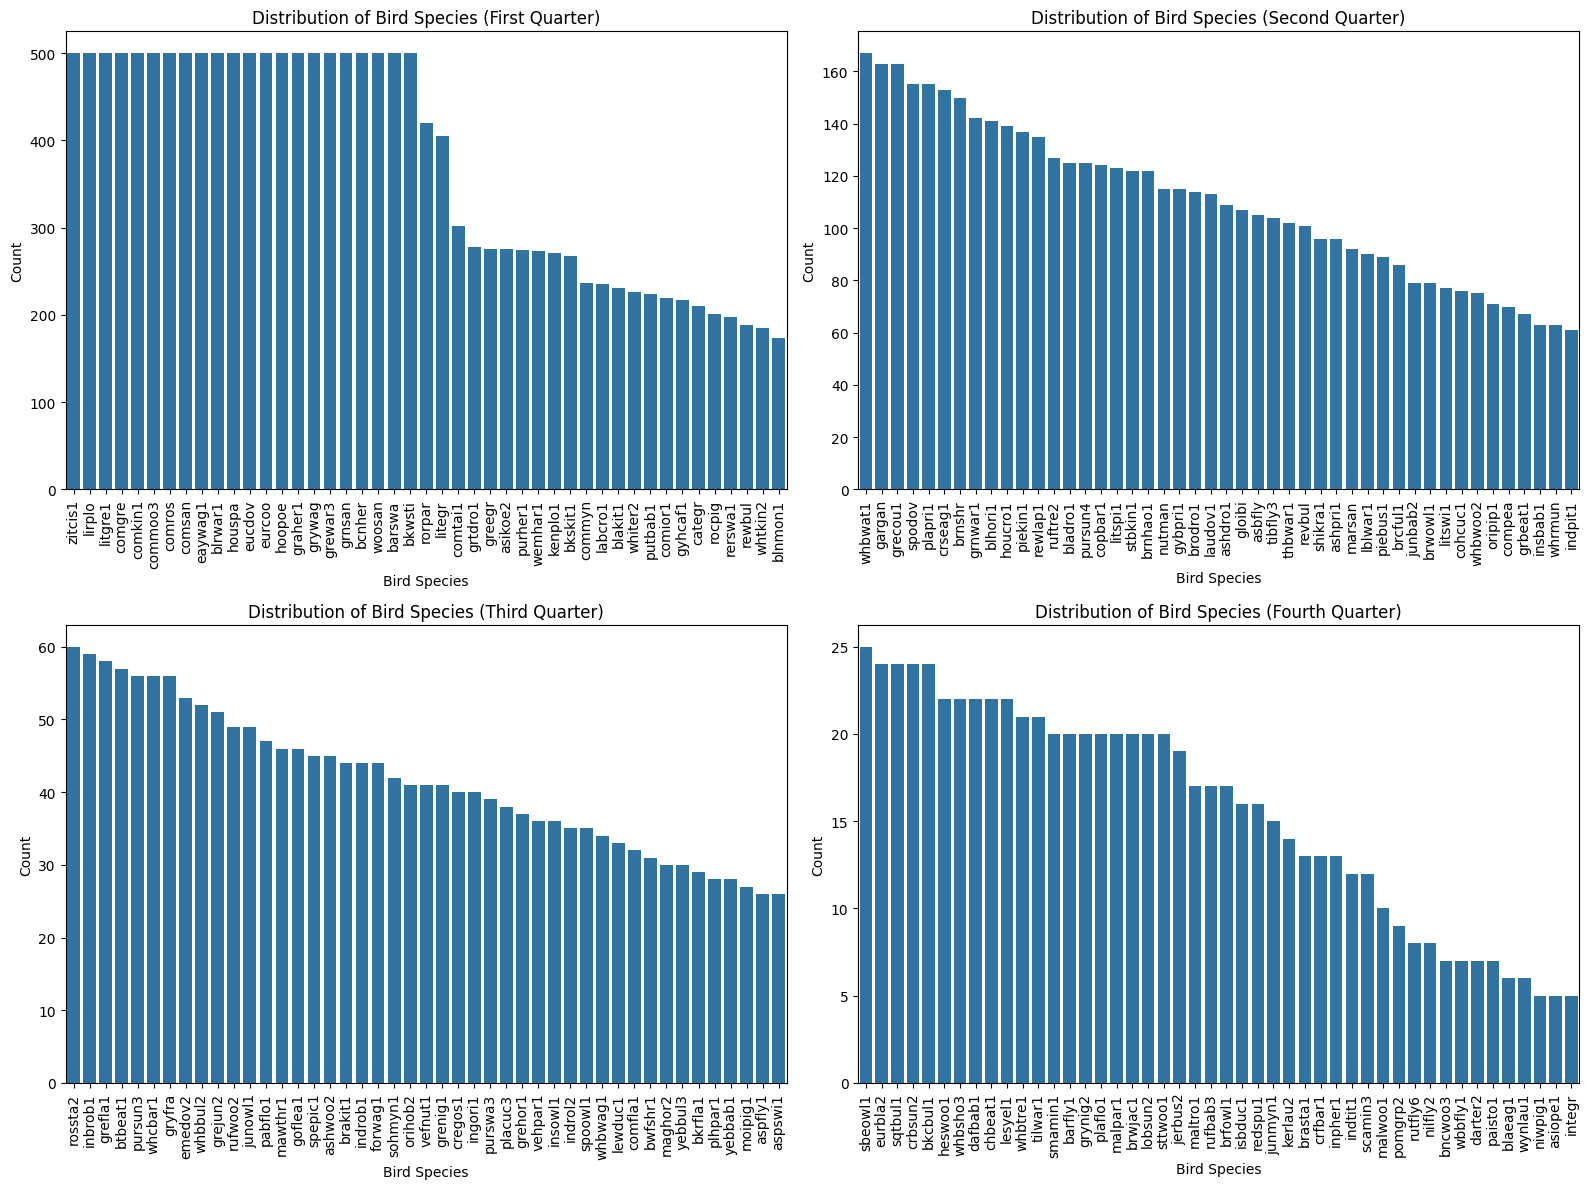

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming metadata_df is your DataFrame containing bird species data

# Calculate the midpoint for splitting the data
midpoint = len(metadata_df['primary_label'].unique()) // 2

# Splitting the unique bird species into four quarters
first_quarter_species = metadata_df['primary_label'].value_counts().index[:midpoint//2]
second_quarter_species = metadata_df['primary_label'].value_counts().index[midpoint//2:midpoint]
third_quarter_species = metadata_df['primary_label'].value_counts().index[midpoint:midpoint+(midpoint//2)]
fourth_quarter_species = metadata_df['primary_label'].value_counts().index[midpoint+(midpoint//2):]

# Filter the data based on the quarters
first_quarter_data = metadata_df[metadata_df['primary_label'].isin(first_quarter_species)]
second_quarter_data = metadata_df[metadata_df['primary_label'].isin(second_quarter_species)]
third_quarter_data = metadata_df[metadata_df['primary_label'].isin(third_quarter_species)]
fourth_quarter_data = metadata_df[metadata_df['primary_label'].isin(fourth_quarter_species)]

# Plotting the distribution of bird species for each quarter
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='primary_label', data=first_quarter_data, order=first_quarter_species)
plt.title('Distribution of Bird Species (First Quarter)')
plt.xlabel('Bird Species')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
sns.countplot(x='primary_label', data=second_quarter_data, order=second_quarter_species)
plt.title('Distribution of Bird Species (Second Quarter)')
plt.xlabel('Bird Species')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
sns.countplot(x='primary_label', data=third_quarter_data, order=third_quarter_species)
plt.title('Distribution of Bird Species (Third Quarter)')
plt.xlabel('Bird Species')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
sns.countplot(x='primary_label', data=fourth_quarter_data, order=fourth_quarter_species)
plt.title('Distribution of Bird Species (Fourth Quarter)')
plt.xlabel('Bird Species')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


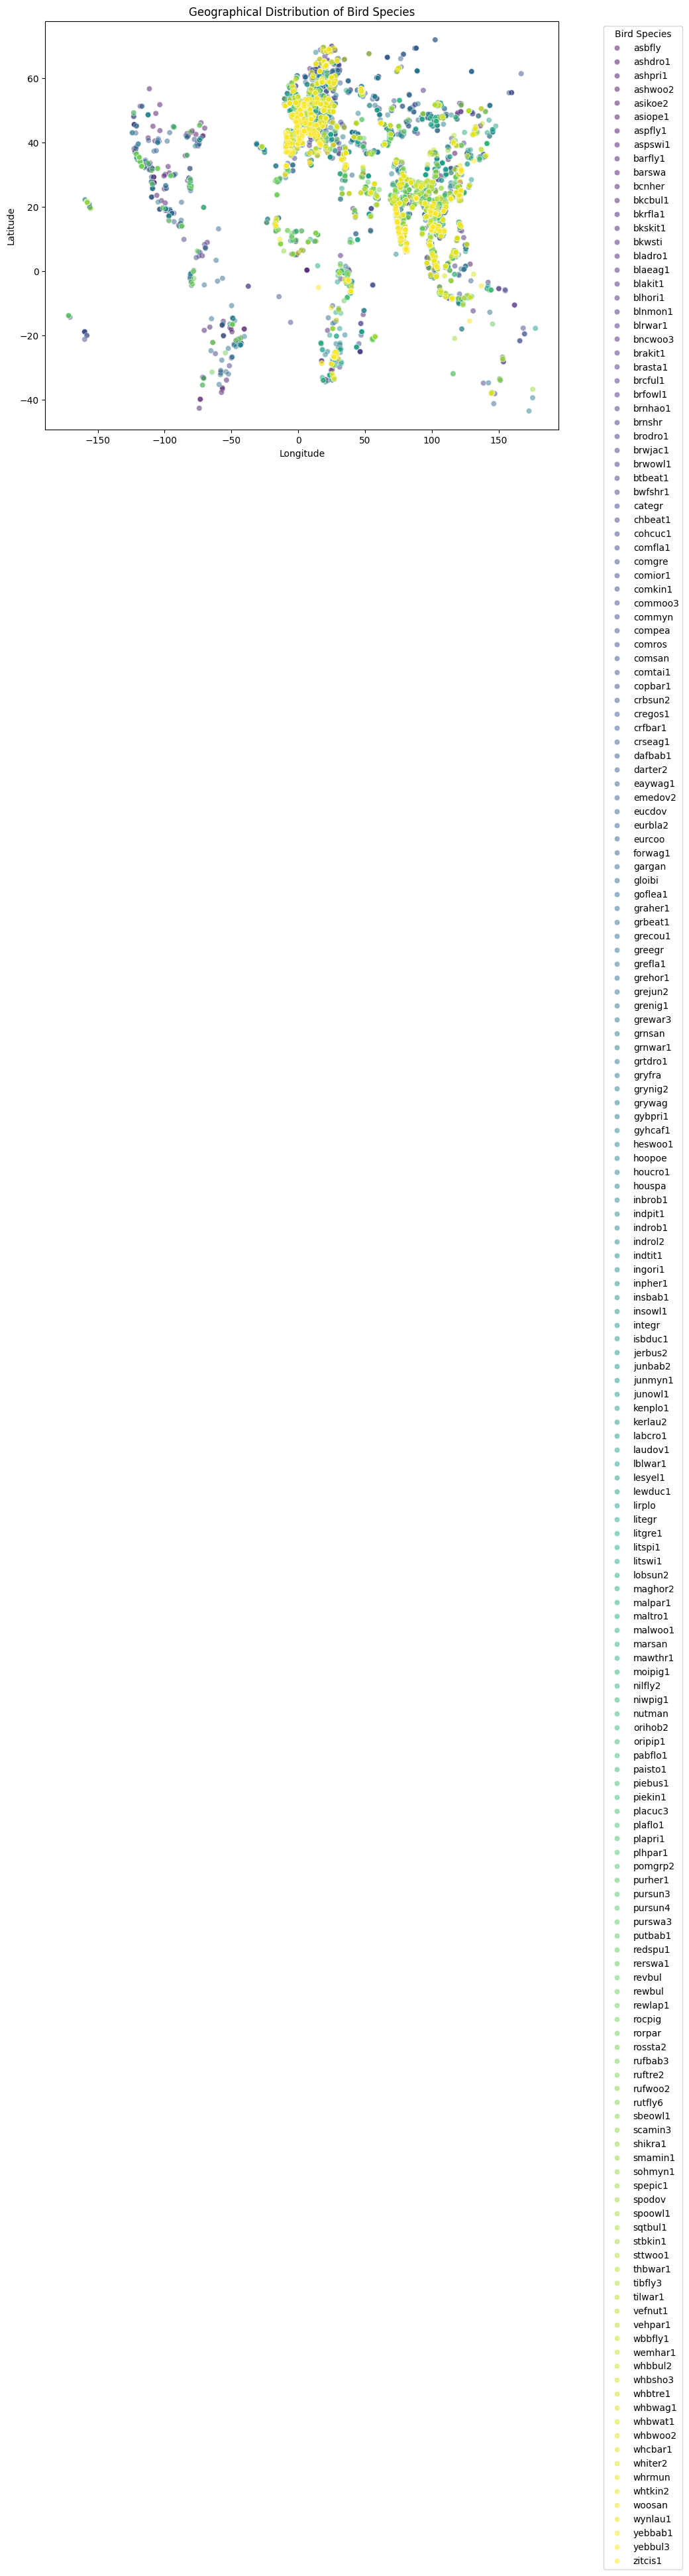

In [18]:
# Relationship between latitude and longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=metadata_df, hue='primary_label', palette='viridis', alpha=0.5)
plt.title('Geographical Distribution of Bird Species')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Bird Species', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

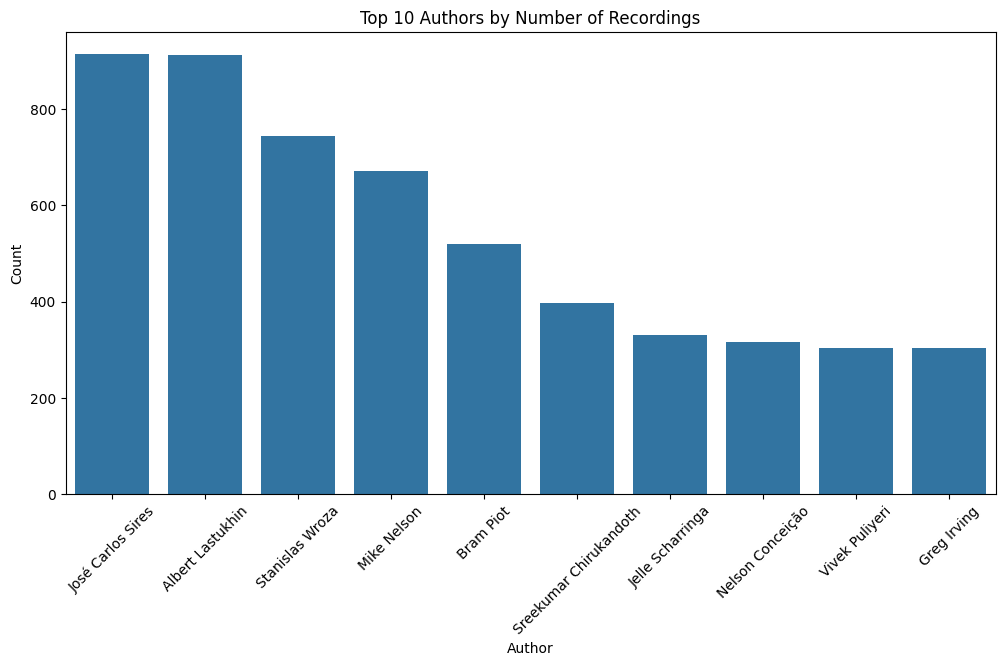

In [19]:
# Distribution of recordings by authors
plt.figure(figsize=(12, 6))
sns.countplot(x='author', data=metadata_df, order=metadata_df['author'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Top 10 Authors by Number of Recordings')
plt.xlabel('Author')
plt.ylabel('Count')
plt.show()

# Exploração dos Áudios

In [94]:
train_path = 'input/birdclef-2024/train_audio/'

# Função que retorna áudios com certo rating x
def audios_rating_x(x):
    rating_x_df = metadata_df[metadata_df['rating'] == x]
    data_0, rate_0 = torchaudio.load(train_path + rating_x_df['filename'].iloc[i])
    print('Áudio com rating =', x)
    return display(Audio(data_0[0, :rate_0*5], rate=rate_0))
    

for i in range(2):
    audios_rating_x(0)

for i in range(2):
    audios_rating_x(3)

for i in range(2):
    audios_rating_x(5)

Áudio com rating = 0


Áudio com rating = 0


Áudio com rating = 3


Áudio com rating = 3


Áudio com rating = 5


Áudio com rating = 5


In [66]:
# ATENÇÃO: Preciso dar um jeito de usar o librosa porque parece que essa função
# dá resultados errados (suponho que seja por conta de algum erro dessa bib)


# Check if the coordinates are within Western Ghats
def is_within_western_ghats(latitude, longitude):
    lower_latitude = 8.0
    upper_latitude = 21.5
    lower_longitude = 73.0
    upper_longitude = 77.5
    return lower_latitude <= latitude <= upper_latitude and lower_longitude <= longitude <= upper_longitude

#Function to plot graphs & print audio file
def visualize_audio_by_bird(common_name, train_meta, audio_path):
    metadata = train_meta[train_meta['common_name'] == common_name]
    if metadata.empty:
        print(f"No data found for the bird species '{common_name}'.")
        return
    
    audio_file = metadata['filename'].iloc[0]
    audio_file_path = f"{audio_path}/{audio_file}"
    latitude = metadata['latitude'].iloc[0]
    longitude = metadata['longitude'].iloc[0]
    rating = metadata['rating'].iloc[0]
    author = metadata['author'].iloc[0]
    primary_label = metadata['primary_label'].iloc[0]
    type = metadata['type'].iloc[0]

    # Check if the coordinates are within the Western Ghats
    if not is_within_western_ghats(latitude, longitude):
        print(f"The bird species '{common_name}' does not have recordings in the Western Ghats.")
        return

    try:
        audio_data, sample_rate = torchaudio.load(audio_file_path)
    except FileNotFoundError:
        print(f"Audio file not found for the bird species '{common_name}'.")
        return

    # Play the audio
    print(f"Playing audio: {common_name}")
    display(ipd.Audio(audio_data, rate=sample_rate))

    '''# Create subplots for audio visualizations
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))

    # Waveform
    axs[0, 0].plot(audio_data)
    axs[0, 0].set_title('Waveform')

    # Spectrogram
    spectrogram = librosa.amplitude_to_db(librosa.stft(audio_data), ref=np.max)
    display.specshow(spectrogram, sr=sample_rate, x_axis='time', y_axis='hz', ax=axs[0, 1])
    axs[0, 1].set_title('Spectrogram')

    # Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    display.specshow(mel_spectrogram, x_axis='time', y_axis='mel', sr=sample_rate, ax=axs[1, 0])
    axs[1, 0].set_title('Mel Spectrogram')

    # Chromagram
    chromagram = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
    display.specshow(chromagram, x_axis='time', y_axis='chroma', sr=sample_rate, ax=axs[1, 1])
    axs[1, 1].set_title('Chromagram')

    # MFCCs
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate)
    display.specshow(mfccs, x_axis='time', sr=sample_rate, ax=axs[2, 0])
    axs[2, 0].set_title('MFCCs')

    # Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sample_rate)
    display.specshow(spectral_contrast, x_axis='time', sr=sample_rate, ax=axs[2, 1])
    axs[2, 1].set_title('Spectral Contrast')

    # Add color bar to the spectrogram plot
    cbar = fig.colorbar(axs[0, 1].collections[0], ax=axs[0, 1], format='%+2.0f dB')'''

    # Print metadata
    print(f"Common Name: {common_name}")
    print(f"Rating: {rating}")
    print(f"Primary Label: {primary_label}")
    print(f"Type: {type}")
    print(f"Author: {author}")
    print(f"Latitude: {latitude}")
    print(f"Longitude: {longitude}")

    # Plot recordings on map
    fig_map = px.scatter_mapbox(metadata, lat="latitude", lon="longitude", zoom=5, title="Recordings Map",
                                hover_name="filename")
    fig_map.update_layout(mapbox_style="open-street-map")
    fig_map.show()

In [58]:
#Check if any specified does not have recording at lat & long of Western Ghat
visualize_audio_by_bird('Little Grebe', metadata_df, train_path)

The bird species 'Little Grebe' does not have recordings in the Western Ghats.


In [95]:
visualize_audio_by_bird('Great Egret', metadata_df, train_path)

#EXEMPLO DE RESULTADO ERRADO PORQUE ESSA ESPÉCIE ESTÁ EM W.G.

The bird species 'Great Egret' does not have recordings in the Western Ghats.


In [67]:
visualize_audio_by_bird('Nilgiri Wood-Pigeon', metadata_df, train_path)

Playing audio: Nilgiri Wood-Pigeon


Common Name: Nilgiri Wood-Pigeon
Rating: 2.0
Primary Label: niwpig1
Type: ['call']
Author: Dipu Karuthedathu
Latitude: 10.2381
Longitude: 77.4892
